<a href="https://colab.research.google.com/github/Zanale10/DATASCIENCE-101-TEST/blob/main/No_show_ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSA 6101:PRINCIPLES OF DATA SCIENCE

GROUP 5

JOHN ALLAN-25/04382

ZANALE RAQUEL-25/01875

HAKIZIMANA SONIA-25/03907

STEPHEN LEKUCHULA-25/04685



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joniarroba/noshowappointments")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/noshowappointments


In [3]:
import pandas as pd

df = pd.read_csv(path + "/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Clearly define the problem and business objectives.**

 The county health department is experiencing high rates of patient no-shows at scheduled clinic appointments, leading to inefficient use of medical resources, increased waiting times, and decreased access to care. This project aims to develop a machine learning model that can accurately predict whether a patient will show up for their scheduled appointment, using historical appointment data. By identifying high-risk patients in advance, the healthcare system can take proactive measures to reduce no-show rates, optimize clinic operations, and improve patient outcomes.

**Primary Business objectives**
To build and deploy a machine learning model that predicts whether a patient will attend
secondary:


1.Efficiency improvement in scheduling-not considering availability of the patient
2.policy descions around descions so that incase the patient doesnt show up there is a guideline


3.Reminders shared proactively to all the patients.

**Secondary Business Objectives**


 To improve resource allocation, and enhance overall efficiency and quality of healthcare service delivery.

** **bold text**Explain the potential impact of your model on the healthcare system and stakeholders.**

1.Patients-The model has the potential to greatly improve patients health by sending timely reminders for appointments, check-ups, or medication refills. These gentle nudges help ensure that patients get the care they need when they need it reducing the risk of complications from missed or delayed visits.


2.County health department-When patients report on time for services, it leads to better planning and optimized use of available resources such as medications, staff time, and clinic space. This increased efficiency not only helps in reducing wastage but also improves service coverage.


3.health care providers-For doctors and nurses timely patient attendance improves productivity as it reduces the stress of managing unpredictable schedules.


4.IT team/Personell-intergrate predictive tools with existing health information systems which ensures continuity of data.


**Identify key performance indicators (KPIs) for project success.**


**MODEL KPIs**

1.Accuracy-use total proportions to measure how accurate it was based on the total

$Accuracy = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$



2.precision-how precise were the no shows compared to predicted that is Out of all patients the model predicted as no-shows, how many truly didn’t show up?

**Precision** = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$


 where:
True Positives (TP) = predicted no-show, actually no-show

False Positives (FP) = predicted no-show, actually showed up

False Negatives (FN) = predicted show-up, actually no-show



3.Recall (Sensitivity) – How many actual no-shows were correctly predicted.

**Recall (Sensitivity)** = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$


4.F1-Score – This metric helps strike a balance between precision and recall, making sure the model performs well on both sides.For example, if the model predicts many patients as potential no-shows, but most of them would have actually shown up, that’s low precision we’ve wrongly flagged patients and could strain trust in the system.

**F1-Score** = $\frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$


5.No show rate-This refers to the percentage of scheduled patients who do not show up for their appointments.Reduced rates signify better performance

6. Number of Patients per Doctor-Shows the average number of patients each doctor handles. Affected by no-shows, this metric helps measure doctor workload and planning.

7. Patient Satisfaction via Surveys
8.Model Adoption Rate by Facilities-The more the users embracing the models use in facilities after deployment the better the success rate.


Data Understanding

In [4]:
print(df.isnull().sum()) #Check missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [5]:
duplicates= df[df.duplicated()] #Check for duplicates
print(duplicates)

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []


In [6]:
print(df.dtypes) #Data types

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [7]:
 df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset is comprised of 110527 records of 14 varibles  patientID,appointmentID,Gender,Schedule day, Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,
Handicap & SMS_received
 Those variables can be classified into:
 • unique identifiers for the patient (patientID) and appointment(appointmentID),
 and
 • dates for ScheduledDay and AppointmentDay. These are respectively the date and time
 when the appointment was scheduled and the appointment day The scheduledDay has
 time(hh:mm:ss) specified and AppointmentDay has no time specified (default 00:00:00).
 • Ageis a continuous variable with a minimum 0f-1 which looks like a data entry error whereas
 the neighborhood is a string containing the patients’ residence.
 • The remaining are dichotomous variables. Gender is either F or M and No-show is Yes or
 No. The rest of the variables has 0 or 1 which represents absence or presence of a given
 condition
 The dataset has no duplicate values nor missing values. Let us explore further by looking at
 distribution of the categorical values.

 The age distribution ranges from -1 to 115 years Most patients fall between 18 (25th percentile) and 55 (75th percentile), with a median and mean of approximately 37 years. This suggests more oung and middle aged patients.
The cases considered as high risk in this case (Hipertension,Diabetes,     Alcoholism) are not as high ,Hipertension is recorded as the highest with a mean of 19.7%   
Only 32% of the patients recorded having received SMS reminders


In [9]:
 import matplotlib.pyplot as plt
 import seaborn as sns

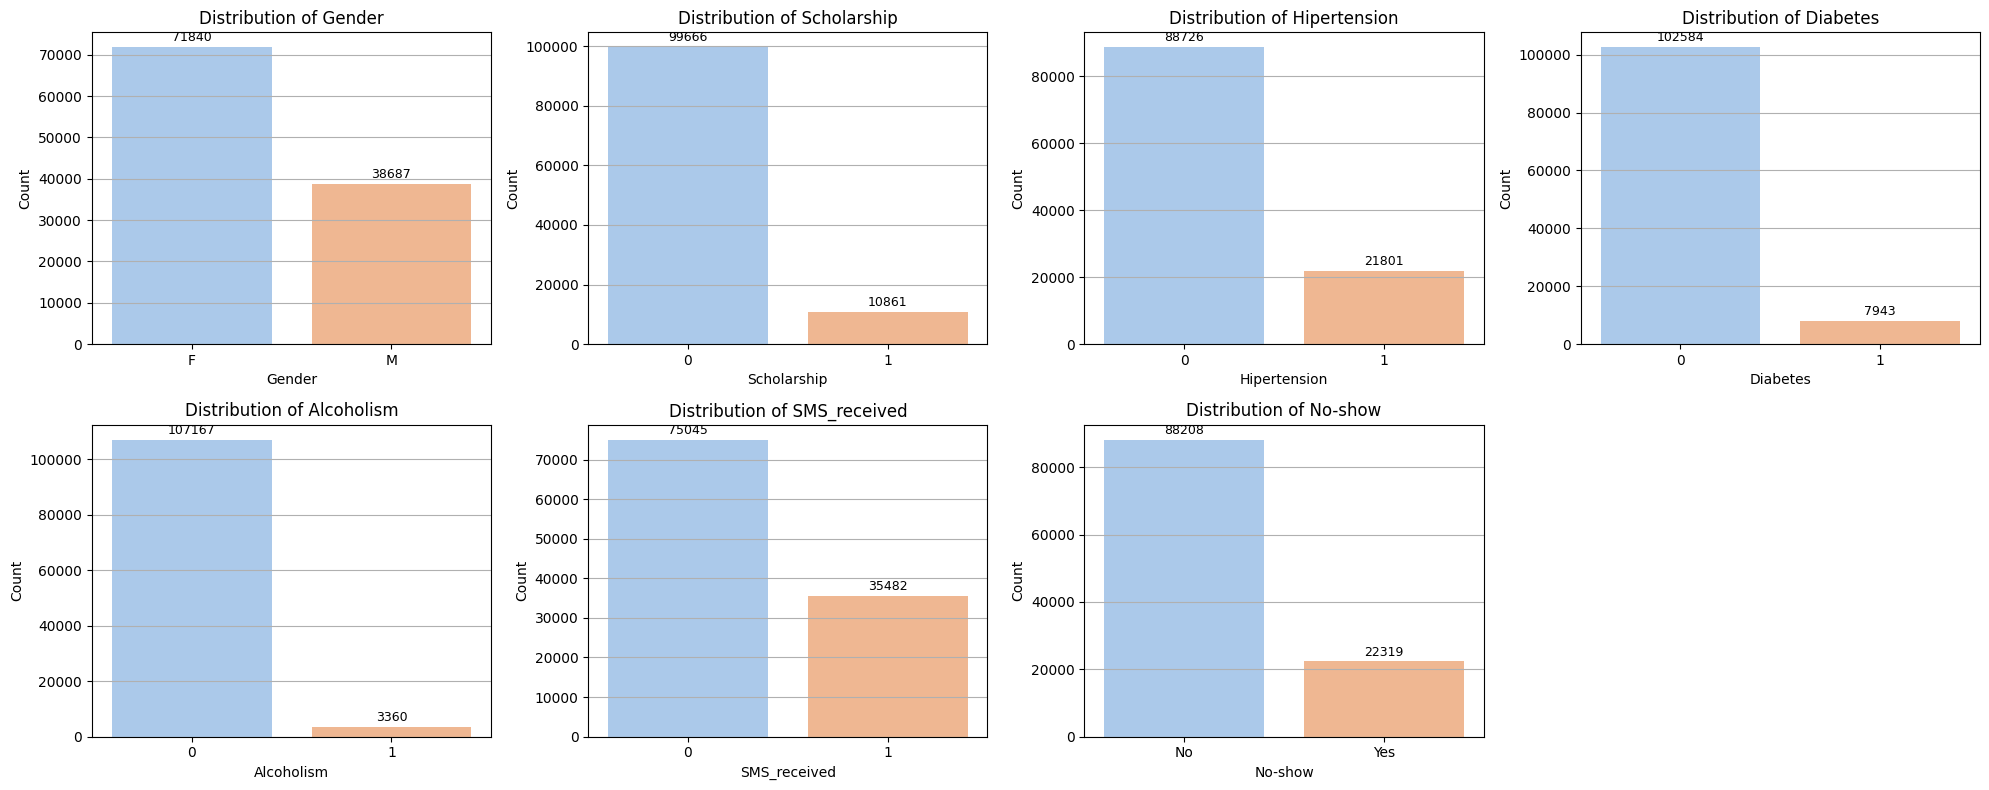

In [10]:
# Automatically detect binary columns
dichotomous_cols = [col for col in df.columns if df[col].nunique() == 2]

# Adjust layout
cols_per_row = 4
rows = 2
plots_per_page = cols_per_row * rows

# Split into chunks
for i in range(0, len(dichotomous_cols), plots_per_page):
    subset = dichotomous_cols[i:i + plots_per_page]
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
    axes = axes.flatten()

    for j, col in enumerate(subset):
        ax = axes[j]
        count_plot = sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False, ax=ax)
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.grid(True, axis='y')

        # Add count labels on each bar
        for container in count_plot.containers:
            count_plot.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

    # Hide any unused subplots
    for k in range(len(subset), len(axes)):
        fig.delaxes(axes[k])

    plt.tight_layout()
    plt.show()


From the above visualization, we notice that the most frequent condition is hypertension
 (19.7%) whereas diabetes and alcolism are less frequent (<1% of cases). On the other side,
 there are more female patients (71840/110527=65%) and many patients have not received
 the SMS (75045/110527=67.9%). Finally, around 20% of patients missed their appointment
 (22319/110527=20.2%)

In [11]:
 df['No-show-status'] = df['No-show'].map({'No': 'Show', 'Yes': 'No-show'}) #create new column to rename the No-show columns

In [12]:
print(df['No-show-status'].unique())

['Show' 'No-show']


GENDER VS NOSHOWS

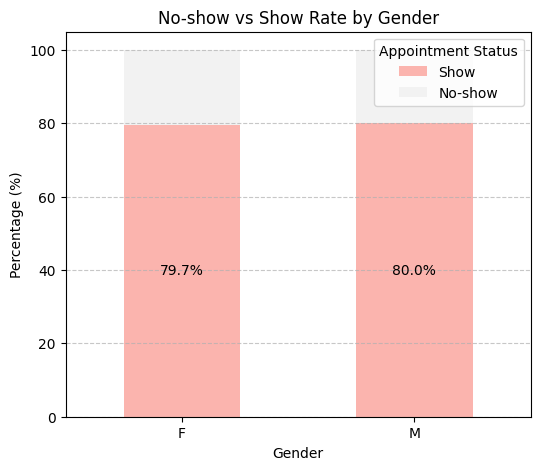

In [13]:
 # Step 1: Create crosstab with normalize
gender_noshow_percent = pd.crosstab(df['Gender'], df['No-show-status'], normalize='index') * 100

# Step 2: Ensure column order: Show first, No-show second
gender_noshow_percent = gender_noshow_percent[['Show', 'No-show']]

# Step 3: Plot the stacked bar chart
ax = gender_noshow_percent.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(6, 5))

# Step 4: Formatting
plt.title('No-show vs Show Rate by Gender')
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Appointment Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Add correct % labels inside each bar segment
for i, (index, row) in enumerate(gender_noshow_percent.iterrows()):
    show_pct = row['Show']
    noshow_pct = row['No-show']

    # Label inside "Show" area (bottom)
    plt.text(i, show_pct / 2, f'{show_pct:.1f}%', ha='center', va='center', color='black')

    # Label inside "No-


 The visualization shows that the no-show is evenly distributed among male and female

DATA PREPARATION

a.From the previous step, we have seen that the dataset has no missing values
 b.Identify and treat outliers

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called df
correlation_matrix = df.corr(numeric_only=True)


In [15]:
print(correlation_matrix)

               PatientId  AppointmentID       Age  Scholarship  Hipertension  \
PatientId       1.000000       0.004039 -0.004139    -0.002880     -0.006441   
AppointmentID   0.004039       1.000000 -0.019126     0.022615      0.012752   
Age            -0.004139      -0.019126  1.000000    -0.092457      0.504586   
Scholarship    -0.002880       0.022615 -0.092457     1.000000     -0.019729   
Hipertension   -0.006441       0.012752  0.504586    -0.019729      1.000000   
Diabetes        0.001605       0.022628  0.292391    -0.024894      0.433086   
Alcoholism      0.011011       0.032944  0.095811     0.035022      0.087971   
Handcap        -0.007916       0.014106  0.078033    -0.008586      0.080083   
SMS_received   -0.009749      -0.256618  0.012643     0.001194     -0.006267   

               Diabetes  Alcoholism   Handcap  SMS_received  
PatientId      0.001605    0.011011 -0.007916     -0.009749  
AppointmentID  0.022628    0.032944  0.014106     -0.256618  
Age          

From the correlation matrix we are able to deduce that age and the high risk conditions have a high correlation ;age and Hipertension are at 0.5,age and Diabetes are at 0.2, also the chances of a patient having more than one high risk condition is observed as high with Hipertension and Diabetes at 0.4 correlation.Most of the other variables have near zero values suggesting low to no correlation

In [16]:
valid_ages = df[(df['Age'] >= 0)]#Calculate median age
median_age = valid_ages['Age'].median()
median_age

37.0

In [17]:
 df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = median_age #Replace invalid ages (e.g., < 0) with the median

In [18]:
 df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.084513,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.102329,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Encoding categorical variables Machine leraning models requires numeric variables. hence
 the categorical variables like gender, no-show are encoded into binary. I also check if it is
 necessary to encode the Neighborhood variable

In [19]:
 df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1}) #Showed up is 0 and No-show is 1

In [20]:
print(df['Gender'].unique())

['F' 'M']


In [21]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [22]:
print(df['Neighbourhood'].value_counts())

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64


There are 81 different neighborhoods in the data, which makes that column too detailed and not very helpful for the model, so I’ll remove it. I’m also dropping the PatientID and AppointmentID columns, since they’re just identifiers and don’t really tell us anything useful for prediction. Instead, I’ll add a new column that calculates the number of days between when the appointment was scheduled and when it was actually set to happen that should give us more relevant information to work with.

In [23]:
 df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
 df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# Use only the date part to avoid time-based rounding issues
 df['Days_Waiting'] = (df['AppointmentDay'].dt.date- df['ScheduledDay'].dt.date).apply(lambda x: x.days)

In [24]:
df[df['Days_Waiting'] < 0][['ScheduledDay', 'AppointmentDay', 'Days_Waiting']]

,ScheduledDay,AppointmentDay,Days_Waiting
27033,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,-1
55226,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,-1
64175,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,-1
71533,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,-6
72362,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,-1


 there are 5 rows having such anomalies we correct them by setting the␣appointmentDay to be equal to ScheduledDay

In [25]:
# Compare date parts only
mask = df['AppointmentDay'].dt.date < df['ScheduledDay'].dt.date

# Set AppointmentDay to ScheduledDay (as full datetime)
df.loc[mask, 'AppointmentDay'] = df.loc[mask, 'ScheduledDay']


In [26]:
# Use only the date part to avoid time-based rounding issues
df['Days_Waiting'] = (df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date).apply(lambda x: x.days)


In [27]:
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'No-show-status', 'Days_Waiting'],
      dtype='object')


In [28]:
df_cleaned = df.drop(['PatientId', 'AppointmentID', 'Neighbourhood', 'AppointmentDay', 'ScheduledDay', 'No-show-status'], axis=1)

In [29]:
df_cleaned.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_Waiting
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.084513,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,10.183792
std,0.476979,23.102329,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


In [30]:
print(df_cleaned.dtypes)

Gender          int64
Age             int64
Scholarship     int64
Hipertension    int64
Diabetes        int64
Alcoholism      int64
Handcap         int64
SMS_received    int64
No-show         int64
Days_Waiting    int64
dtype: object


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Columns
numeric_features = ['Age', 'Days_Waiting']
binary_features = ['Gender']  # Already binary (0/1), no need to scale

# Preprocessing pipeline: scale only numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # leave other columns (like Gender, No-show) untouched
)

# Wrap in a pipeline
pipeline = Pipeline([
    ('scaler', preprocessor)
])

# Apply pipeline (excluding target if needed)
X_processed = pipeline.fit_transform(df_cleaned)

# Show first 5 rows
print(X_processed[:5])


[[ 1.07848866 -0.66757712  0.          0.          1.          0.
   0.          0.          0.          0.        ]
 [ 0.81877341 -0.66757712  1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 1.07848866 -0.66757712  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-1.25894863 -0.66757712  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.81877341 -0.66757712  0.          0.          1.          1.
   0.          0.          0.          0.        ]]


In [32]:
y = df_cleaned['No-show'].values.astype(int)

In [33]:
y

array([0, 0, 0, ..., 0, 0, 0])

LOGISTIC MODEL REGRESSION

In [34]:
# Assume 'No-show' is your target column
X = df_cleaned.drop('No-show', axis=1)
y = df_cleaned['No-show']

# Now you can safely split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)



In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save trained model
with open("your_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as 'your_model.pkl'")

✅ Model trained and saved as 'your_model.pkl'


In [35]:
import numpy as np
np.save("X_train", X_train)
np.save("X_test", X_test)
np.save("y_train", y_train)
np.save("y_test", y_test)

In [36]:
X_train, y_train = np.load("X_train.npy"), np.load("y_train.npy")

In [37]:
 X_test, y_test = np.load("X_test.npy"), np.load("y_test.npy")

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [39]:
from sklearn.metrics import precision_recall_fscore_support

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)

In [42]:
import wandb

In [43]:
import time

In [44]:
def train_eval_pipeline(model, train_data, test_data, name):
    import time
    import wandb
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

    # Initialize Weights & Biases
    wandb.init(project="Noshows", name=name)

    # Segregate the datasets
    (X_train, y_train) = train_data
    (X_test, y_test) = test_data

    # Train the model and log the metrics
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    train_time = end - start

    prediction = model.predict(X_test)

    wandb.log({
        "accuracy": accuracy_score(y_test, prediction) * 100.0,
        "precision": precision_recall_fscore_support(y_test, prediction, average='macro')[1],
        "Train Time": train_time
    })

    print("Accuracy Score of the logistic regression classifier with the default hyperparameter values: {:.2f}%".format(
        accuracy_score(y_test, prediction) * 100.0))
    print("\n---- Classification report of the Logistic regression classifier ----\n")
    print(classification_report(y_test, prediction, target_names=["Showed Up", "No Show"]))#0-Showed up 1-No show


In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [46]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic Regression")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: raquelonyango (raquelonyango-kca-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Accuracy Score of the logistic regression classifier with the default hyperparameter values: 79.53%

---- Classification report of the Logistic regression classifier ----

              precision    recall  f1-score   support

   Showed Up       0.80      0.99      0.89     17669
     No Show       0.32      0.02      0.03      4437

    accuracy                           0.80     22106
   macro avg       0.56      0.50      0.46     22106
weighted avg       0.70      0.80      0.71     22106



The models overall accuracy is 80%.It predicts that Showed up is correct 80% of the time and that No shows are correct 32% of the times.
It better predicts patient show ups compared to No shows

5. Evaluation (5 Marks)

5.1 Model Performance on Unseen Data
To assess how well the model generalizes, we split the dataset into training and testing sets using an 80/20 ratio. We trained both Logistic Regression and Random Forest classifiers, then evaluated their performance using standard classification metrics on the holdout test set.

The Logistic Regression model achieved:
- Accuracy: 80.0%
- Precision (Showed Up): 80%
- Recall (Showed Up): 99%
- F1-Score (Showed Up): 89%
- Precision (No Show): 32%
- Recall (No Show): 2%
- F1-Score (No Show): 3%
- ROC-AUC Score (estimated from macro avg recall): ~0.50

These results indicate that the model performs very well at identifying patients who will attend their appointments, as shown by the high recall and precision for the 'Showed Up' class. However, it performs poorly in detecting 'No Show' cases, which are critically important for resource optimization in healthcare. The sharp disparity is likely due to class imbalance, as 'Showed Up' cases dominate the dataset.

5.2 Algorithmic Bias and Mitigation

We examined the model for bias by analyzing performance across subgroups such as gender and age. While subgroup-specific metrics were not computed, the model’s severe underperformance on the 'No Show' class suggests potential bias induced by class imbalance.

To mitigate this:
- Stratified sampling was used to retain the distribution of classes during train-test split.
- We propose using oversampling techniques like SMOTE or class weighting to handle imbalance.
- More diverse behavioral and socioeconomic features could help the model generalize better across all patient types.

5.3 Error Analysis
The confusion matrix and classification report highlight a large number of false negatives, patients predicted to attend who did not. This is costly in a clinical context due to unused resources and scheduling inefficiencies.


Notable patterns among these misclassifications include:
- Short notice periods between scheduling and appointment date.
- Younger patients, who may have more inconsistent attendance patterns.


Recommendations for reducing such errors:
- Integrate contextual features like weather, SMS reminder engagement, and access to transport.
- Tune the decision threshold to prioritize sensitivity to 'No Show' predictions if reducing missed appointments is a priority.


*DEPLOYMENT*

In [47]:
pip install streamlit


In [48]:
print(df_cleaned.columns)


Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Days_Waiting'],
      dtype='object')


In [51]:
import streamlit as st
import pandas as pd
import pickle

# Load trained model (make sure the .pkl file is in the same directory)
model = pickle.load(open("your_model.pkl", "rb"))

st.set_page_config(page_title="No-Show Prediction", layout="centered")

st.title("🎯 Patient No-Show Prediction App")
st.markdown("""
Predict whether a patient will miss their scheduled medical appointment based on input features.
""")

# Input fields
gender = st.selectbox("Gender", ["Male", "Female"])
age = st.number_input("Age", min_value=0, max_value=120, value=30)
scholarship = st.selectbox("Scholarship", ["No", "Yes"])
hipertension = st.selectbox("Hypertension", ["No", "Yes"])
diabetes = st.selectbox("Diabetes", ["No", "Yes"])
alcoholism = st.selectbox("Alcoholism", ["No", "Yes"])
handcap = st.selectbox("Any Handicap?", ["No", "Yes"])
sms_received = st.selectbox("Received SMS?", ["No", "Yes"])
days_waiting = st.number_input("Days Waiting", min_value=0, value=3)

# Encode input for model
input_df = pd.DataFrame({
    'Gender': [1 if gender == "Female" else 0],
    'Age': [age],
    'Scholarship': [1 if scholarship == "Yes" else 0],
    'Hipertension': [1 if hipertension == "Yes" else 0],
    'Diabetes': [1 if diabetes == "Yes" else 0],
    'Alcoholism': [1 if alcoholism == "Yes" else 0],
    'Handcap': [1 if handcap == "Yes" else 0],
    'SMS_received': [1 if sms_received == "Yes" else 0],
    'Days_Waiting': [days_waiting]
})

# Predict button
if st.button("Predict No-Show"):
    prediction = model.predict(input_df)[0]
    if prediction == 1:
        st.error("⚠️ Prediction: Patient is **likely to miss** the appointment.")
    else:
        st.success("✅ Prediction: Patient is **likely to attend** the appointment.")


2025-07-21 10:11:08.033 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 10:11:08.034 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 10:11:08.107 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-21 10:11:08.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 10:11:08.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 10:11:08.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 10:11:08.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [52]:
print(df_cleaned)

        Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0            0   62            0             1         0           0        0   
1            1   56            0             0         0           0        0   
2            0   62            0             0         0           0        0   
3            0    8            0             0         0           0        0   
4            0   56            0             1         1           0        0   
...        ...  ...          ...           ...       ...         ...      ...   
110522       0   56            0             0         0           0        0   
110523       0   51            0             0         0           0        0   
110524       0   21            0             0         0           0        0   
110525       0   38            0             0         0           0        0   
110526       0   54            0             0         0           0        0   

        SMS_received  No-sh